## I. Pre-processing and Training Data Development

- Goal is to create a cleaned development dataset you can use to complete the modeling step of this project.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import stem

In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\Springboard repo_github\\Springboard-DS-Track\\Capstone Three_StackOverflow\\notebooks'

In [3]:
df = pd.read_csv("..\data\Stackoverflow_cleansed.csv")

In [4]:
df.shape

(1455901, 8)

In [5]:
df.sample(5)

,Unnamed: 0,Q_Score,A_Score,Id,Title,Q_Body,Tag,A_Body
718725,864024,3,3,19544030,parse log file check date report result,pi need take time stamp printed codeafter ftp ...,"regex, linux, bash, shell, grep",defining records correctly makes things lot ea...
829425,992630,0,0,22547000,force ios7 app start home screen,pi app multiple view controllers home screen p...,"iphone, ios7",press home button application goes background ...
193521,239114,5,2,5483590,android listview making search filt,pis way create search filter custom list view ...,"android, listview, filter, adapter, base",example list view created using base adapter s...
932620,1110699,1,0,19855350,sap abap iw31 searching user exit enh point ge...,pi working transaction iw31 task rewrite field...,"sap, abap",sap release use checked include lcoihf2v find ...
708303,851830,1,0,19259210,apache modrewrite specific url,pim trying make one specific redirect googling...,"apache, .htaccess, mod-rewrite, redirect",rule rewritten rewriterule quest blankparentpa...


In [6]:
df.Tag.value_counts()

java                                               11396
javascript, jquery                                 10896
android                                             9937
javascript                                          9759
php                                                 9687
                                                   ...  
json, twitter, twitter-streaming-api                   1
python, matplotlib, jupyter, jupyter-notebook          1
cryptography, openssl                                  1
javascript, jquery, html, firefox, autocomplete        1
python, canvas, tkinter, frame                         1
Name: Tag, Length: 511628, dtype: int64

In [7]:
stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('punkt')

stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gosal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gosal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#df['Q_Body'] = df[~df['Q_Body'].str.contains(r'(?<!\S)(?!http|\S*www\.)\S{12}')]
#df.shape[0]

**Note**: Stemming on Q_Body and A_Body column was not done in the Data Wrangling step, so resuming this step so all the 'text' columns in the dataframe are cleansed as a part of Text pre-processing

In [9]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if len(token) < 20 ]
    return ' '.join(stemmed_tokens)

df['Q_Body'] = df['Q_Body'].apply(stem_sentences)
df['A_Body'] = df['A_Body'].apply(stem_sentences)
df.shape[0]

1455901

In [10]:
df.dtypes

Unnamed: 0     int64
Q_Score        int64
A_Score        int64
Id             int64
Title         object
Q_Body        object
Tag           object
A_Body        object
dtype: object

In [11]:
df.head(4)

,Unnamed: 0,Q_Score,A_Score,Id,Title,Q_Body,Tag,A_Body
0,0,7,1,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",valid captur separ getter setter valid method ...
1,1,7,3,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",perspect maintain code think much valid setter...
2,2,7,3,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",depend gener code fail fast valu set multipl p...
3,3,7,1,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...


In [12]:
#df['Q_Body'] = df['Q_Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#### 1. Standardize the magnitude of numeric features using a scaler

In [13]:
# Create subset of only the numeric columns
df_numeric = df.select_dtypes(include=['int64','float'])
print(df_numeric.columns)

Index(['Unnamed: 0', 'Q_Score', 'A_Score', 'Id'], dtype='object')


In [14]:
# Create subset of only the categorical variable columns
df_categorical = df.select_dtypes(include=['object'])
print(df_categorical.columns)

Index(['Title', 'Q_Body', 'Tag', 'A_Body'], dtype='object')


In [15]:
df_numeric[['Q_Score','A_Score']].describe()

,Q_Score,A_Score
count,1.455901e+06,1.455901e+06
mean,9.834082e-01,1.038608e+00
std,1.674276e+00,1.273145e+00
min,-4.000000e+00,-3.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00
max,7.000000e+00,5.000000e+00


In [16]:
# Instantiate StandardScaler to generate the absolute values are mapped in the range [0, 1].
# This is optional step for our dataset since there are not many outliers, however, this condenses data even better

scaler = MaxAbsScaler()

# Fit SS_scaler to the data
scaler.fit(df_numeric[['Q_Score','A_Score']])

# Transform the data using the fitted scaler
df_numeric[['Q_Score_scaled','A_Score_scaled']] = scaler.transform(df_numeric[['Q_Score','A_Score']])

# Compare the origional and transformed column
print(df_numeric[['Q_Score_scaled','A_Score_scaled']].head(5))

   Q_Score_scaled  A_Score_scaled
0             1.0             0.2
1             1.0             0.6
2             1.0             0.6
3             1.0             0.2
4             1.0             0.2


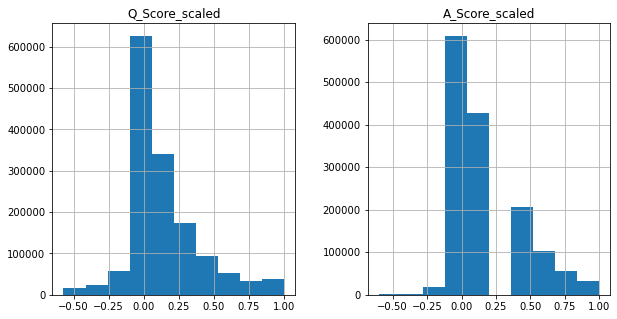

In [17]:
# Create a histogram for the 2 
plt.rcParams["figure.figsize"] = (10,5)

df_numeric.hist(['Q_Score_scaled','A_Score_scaled'])
plt.show()

In [18]:
# Drop non scaled column
#df_numeric.drop(columns=['Q_Score','A_Score'], inplace=True)
#df_numeric.head(5)

In [19]:
df_numeric[['Q_Score_scaled','A_Score_scaled']].describe()

,Q_Score_scaled,A_Score_scaled
count,1.455901e+06,1.455901e+06
mean,1.404869e-01,2.077217e-01
std,2.391823e-01,2.546290e-01
min,-5.714286e-01,-6.000000e-01
25%,0.000000e+00,0.000000e+00
50%,1.428571e-01,2.000000e-01
75%,2.857143e-01,4.000000e-01
max,1.000000e+00,1.000000e+00


In [20]:
df_numeric_scaled = pd.concat([df_categorical, df_numeric], axis=1, sort=False)
df_numeric_scaled.head(5)

,Title,Q_Body,Tag,A_Body,Unnamed: 0,Q_Score,A_Score,Id,Q_Score_scaled,A_Score_scaled
0,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",valid captur separ getter setter valid method ...,0,7,1,2750,1.0,0.2
1,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",perspect maintain code think much valid setter...,1,7,3,2750,1.0,0.6
2,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",depend gener code fail fast valu set multipl p...,2,7,3,2750,1.0,0.6
3,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...,3,7,1,2750,1.0,0.2
4,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",like implement idataerrorinfo put valid logic ...,4,7,1,2750,1.0,0.2


In [21]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455901 entries, 0 to 1455900
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Title           1455901 non-null  object 
 1   Q_Body          1455901 non-null  object 
 2   Tag             1455898 non-null  object 
 3   A_Body          1455901 non-null  object 
 4   Unnamed: 0      1455901 non-null  int64  
 5   Q_Score         1455901 non-null  int64  
 6   A_Score         1455901 non-null  int64  
 7   Id              1455901 non-null  int64  
 8   Q_Score_scaled  1455901 non-null  float64
 9   A_Score_scaled  1455901 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 111.1+ MB


In [22]:
df_question = df_numeric_scaled.drop(columns=['Title', 'A_Body', 'Unnamed: 0', 'Id', 'Q_Score_scaled','A_Score_scaled','Q_Score','A_Score'])
print(df_question.head(2))

                                              Q_Body  \
0  pim wonder good idea make stronggettersstrong ...   
1  pim wonder good idea make stronggettersstrong ...   

                                          Tag  
0  optimization, setter, getter, verification  
1  optimization, setter, getter, verification  


#### 2. Split ```Tag``` column into multiple columns delimited by ```,```

In [23]:
df_question_tag_split = df_question['Tag'].str.split(',').apply(pd.Series)

In [24]:
df_question_tags = df_question_tag_split.replace(np.nan,0).drop_duplicates()
df_question_tags.head(2)

,0,1,2,3,4
0,optimization,setter,getter,verification,0
7,windows,64bit,wmi,0,0


In [25]:
#top_20_tags = df_question_tag['Tag'].value_counts().head(20)
#top_20_list = [top_20_tags]
#top_20_tags = ['java','javascript, jquery','android', 'javascript', 'php', 'python', 'jquery', 'c#', 'php, mysql', 
#               'c', 'javascript, jquery, html', 'javascript, jquery, html, css', 'mysql, sql', 'r', 'java, android', 
#               'sql, sql-server', 'javascript, html']
               
#df_tag_top_20 = df_question_tag.loc[df_question_tag['Tag'].isin(top_20_tags)]
#question_top_20 = df_question_tag[df_question_tag['Tag'].isin(top_20_tags)]
#question_top_20_tag = question_top_20['Q_Body']
#print(question_top_20_tag.shape[0], df_tag_top_20.shape[0])

In [26]:
print(df_question_tags.shape[0], df_question.shape[0])

511629 1455901


In [27]:
df_merged = pd.concat([df_question, df_question_tags], axis = 1, sort=False)
df_merged.shape[0]

1455901

In [28]:
df_merged = df_merged.drop_duplicates().dropna()
df_merged.shape[0]

511628

In [29]:
df_merged = df_merged.rename(columns={0:'Tag1',1:'Tag2',2:'Tag3',3:'Tag4',4:'Tag5'}).drop(columns={'Tag'})
print(df_merged.shape[0], df_merged.head(2))

511628                                               Q_Body          Tag1     Tag2  \
0  pim wonder good idea make stronggettersstrong ...  optimization   setter   
7  pive work project access wmi get inform softwa...       windows    64bit   

      Tag3           Tag4 Tag5  
0   getter   verification    0  
7      wmi              0    0  


#### 3. Perform TFIDF on categorical features to fit and transform data

- We also want a measure of how unique a word is i.e. how infrequently the word occurs across all documents (inverse document frequency or idf). So, the product of tf & idf (TF-IDF) of a word gives a product of how frequent this word is in the document multiplied by how unique the word is w.r.t. the entire corpus of documents.
- Words in the document with a high tfidf score occur frequently in the document and provide the most information about that specific document.

**TFIDF on** 
- Question body and Tags
- Answer body and Scores (Not scope of this notebook)

Furthermore, create dataframes with the vectorized values before performing modeling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer = TfidfVectorizer(max_features=200, ngram_range=(1, 1), stop_words = 'english')

In [31]:
tfidf_question= vectorizer.fit_transform(df_merged['Q_Body'])

# Create a DataFrame with these features
tv_df_question = pd.DataFrame(tfidf_question.toarray(), 
                     columns=vectorizer.get_feature_names())

print(tv_df_question.head(5))

         10  abl    access       ad       add       amp  anoth     anyon  app  \
0  0.000000  0.0  0.000000  0.00000  0.000000  0.000000    0.0  0.000000  0.0   
1  0.134065  0.0  0.124256  0.00000  0.000000  0.000000    0.0  0.000000  0.0   
2  0.000000  0.0  0.000000  0.00000  0.000000  0.000000    0.0  0.271155  0.0   
3  0.000000  0.0  0.000000  0.00000  0.000000  0.250347    0.0  0.000000  0.0   
4  0.000000  0.0  0.000000  0.33942  0.123464  0.000000    0.0  0.000000  0.0   

     applic  ...  variabl   version      view  void      want  way  web  \
0  0.000000  ...      0.0  0.000000  0.000000   0.0  0.000000  0.0  0.0   
1  0.000000  ...      0.0  0.386785  0.000000   0.0  0.075587  0.0  0.0   
2  0.000000  ...      0.0  0.000000  0.563634   0.0  0.000000  0.0  0.0   
3  0.175741  ...      0.0  0.000000  0.000000   0.0  0.000000  0.0  0.0   
4  0.000000  ...      0.0  0.000000  0.000000   0.0  0.169048  0.0  0.0   

     window      work  write  
0  0.000000  0.000000    0.0  


In [32]:
sample_row = tv_df_question.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head(5))

make       0.503336
code       0.389381
databas    0.321536
think      0.319719
idea       0.318799
Name: 0, dtype: float64


In [33]:
df_final = pd.concat([tv_df_question, df_merged], axis = 1, sort=False)
df_final.head(2)

,10,abl,access,ad,add,amp,anoth,anyon,app,applic,...,web,window,work,write,Q_Body,Tag1,Tag2,Tag3,Tag4,Tag5
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,pim wonder good idea make stronggettersstrong ...,optimization,setter,getter,verification,0
1,0.134065,0.0,0.124256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.376922,0.219904,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_final = df_final.drop(columns={'Q_Body'})
print(df_final.shape[0], df_final.head(4))

842097          10  abl    access   ad  add       amp  anoth     anyon  app  \
0  0.000000  0.0  0.000000  0.0  0.0  0.000000    0.0  0.000000  0.0   
1  0.134065  0.0  0.124256  0.0  0.0  0.000000    0.0  0.000000  0.0   
2  0.000000  0.0  0.000000  0.0  0.0  0.000000    0.0  0.271155  0.0   
3  0.000000  0.0  0.000000  0.0  0.0  0.250347    0.0  0.000000  0.0   

     applic  ...  way  web    window      work  write          Tag1     Tag2  \
0  0.000000  ...  0.0  0.0  0.000000  0.000000    0.0  optimization   setter   
1  0.000000  ...  0.0  0.0  0.376922  0.219904    0.0           NaN      NaN   
2  0.000000  ...  0.0  0.0  0.000000  0.000000    0.0           NaN      NaN   
3  0.175741  ...  0.0  0.0  0.000000  0.000000    0.0           NaN      NaN   

      Tag3           Tag4  Tag5  
0   getter   verification     0  
1      NaN            NaN   NaN  
2      NaN            NaN   NaN  
3      NaN            NaN   NaN  

[4 rows x 205 columns]


In [35]:
df_final = df_final.dropna()
print(df_final.shape[0], df_final.head(4))

181159      10  abl  access   ad       add  amp  anoth  anyon  app    applic  ...  \
0   0.0  0.0     0.0  0.0  0.000000  0.0    0.0    0.0  0.0  0.000000  ...   
7   0.0  0.0     0.0  0.0  0.134123  0.0    0.0    0.0  0.0  0.000000  ...   
9   0.0  0.0     0.0  0.0  0.000000  0.0    0.0    0.0  0.0  0.227786  ...   
13  0.0  0.0     0.0  0.0  0.000000  0.0    0.0    0.0  0.0  0.000000  ...   

    way  web    window  work    write          Tag1                   Tag2  \
0   0.0  0.0  0.000000   0.0  0.00000  optimization                 setter   
7   0.0  0.0  0.000000   0.0  0.00000       windows                  64bit   
9   0.0  0.0  0.000000   0.0  0.51629           sql             sql-server   
13  0.0  0.0  0.732616   0.0  0.00000       asp.net   business-logic-layer   

                 Tag3           Tag4  Tag5  
0              getter   verification     0  
7                 wmi              0     0  
9            database        diagram     0  
13   objectdatasource          

In [36]:
df_final.dtypes

10        float64
abl       float64
access    float64
ad        float64
add       float64
           ...   
Tag1       object
Tag2       object
Tag3       object
Tag4       object
Tag5       object
Length: 205, dtype: object

#### 4. Convert categorical variables into numeric variables

In [37]:
print(df_final['Tag1'].value_counts().head(5), df_final['Tag2'].value_counts().head(5), 
      df_final['Tag3'].value_counts().head(5), df_final['Tag4'].value_counts().head(5), 
      df_final['Tag5'].value_counts().head(5))

c#            18329
java          15608
php           12673
javascript    10157
c++            7666
Name: Tag1, dtype: int64  jquery     3772
 .net       3705
 asp.net    2723
0           2598
 html       2441
Name: Tag2, dtype: int64 0        30219
 html      966
 ios       827
 ajax      728
 css       683
Name: Tag3, dtype: int64 0        93765
 json      205
 ajax      186
 ipad      169
 css       165
Name: Tag4, dtype: int64 0                  148171
 cordova               41
 css3                  35
 drop-down-menu        35
 post                  35
Name: Tag5, dtype: int64


**Apply one hot encoding using ```get_dummies```**

In [38]:
# Pick top 10 tags and apply one hot encoding on the dataframe to assign true/ false based on top 10 tag being found or not 
# for every questions across dataframe
# drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. 
# which reduces the correlations created among dummy variables.

tags = ['c#','java','php','javascript','c++','.net','asp.net','html','ios','ajax']
df_tag = df_final[['Tag1','Tag2','Tag3','Tag4','Tag5']]
final_top_10_tags= pd.get_dummies(df_tag.isin(tags), drop_first=True)

df_ques = df_final.drop(['Tag1','Tag2','Tag3','Tag4','Tag5'], axis=1)

df_final = pd.concat([df_ques, final_top_10_tags], axis=1)
print(df_final.head(2), df_final.shape[0])

    10  abl  access   ad       add  amp  anoth  anyon  app  applic  ...  way  \
0  0.0  0.0     0.0  0.0  0.000000  0.0    0.0    0.0  0.0     0.0  ...  0.0   
7  0.0  0.0     0.0  0.0  0.134123  0.0    0.0    0.0  0.0     0.0  ...  0.0   

   web  window  work  write   Tag1   Tag2   Tag3   Tag4   Tag5  
0  0.0     0.0   0.0    0.0  False  False  False  False  False  
7  0.0     0.0   0.0    0.0  False  False  False  False  False  

[2 rows x 205 columns] 181159


In [39]:
df_final[['Tag1','Tag2','Tag3','Tag4','Tag5']] *= 1
df_final.sample(2)

,10,abl,access,ad,add,amp,anoth,anyon,app,applic,...,way,web,window,work,write,Tag1,Tag2,Tag3,Tag4,Tag5
88535,0.0,0.0,0.38054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.224489,0.0,0,0,0,0,0
52250,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0,0,0,0,0


#### 5. Training data development and Feature Selection

In [40]:
from sklearn.model_selection import train_test_split

train_question_df, test_question_df = train_test_split(df_final, test_size=0.3)

In [41]:
print(train_question_df.shape[0], test_question_df.shape[0])

126811 54348


In [42]:
X_train = train_question_df.loc[:, '10':'write']
y_train = train_question_df.loc[:, 'Tag1':'Tag5']
print(X_train.head(2), y_train.head(2))

        10  abl  access   ad  add       amp     anoth  anyon  app  applic  \
19281  0.0  0.0     0.0  0.0  0.0  0.000000  0.213059    0.0  0.0     0.0   
55421  0.0  0.0     0.0  0.0  0.0  0.267905  0.000000    0.0  0.0     0.0   

       ...  variabl  version  view  void      want  way  web  window  work  \
19281  ...      0.0      0.0   0.0   0.0  0.135192  0.0  0.0     0.0   0.0   
55421  ...      0.0      0.0   0.0   0.0  0.000000  0.0  0.0     0.0   0.0   

       write  
19281    0.0  
55421    0.0  

[2 rows x 200 columns]        Tag1  Tag2  Tag3  Tag4  Tag5
19281     0     0     0     0     0
55421     0     0     0     0     0


In [43]:
X_test = test_question_df.loc[:, '10':'write']
y_test = test_question_df.loc[:, 'Tag1':'Tag5']
print(X_test.head(2), y_test.head(2))

         10  abl  access   ad  add  amp  anoth  anyon       app  applic  ...  \
185871  0.0  0.0     0.0  0.0  0.0  0.0    0.0    0.0  0.000000     0.0  ...   
123376  0.0  0.0     0.0  0.0  0.0  0.0    0.0    0.0  0.233381     0.0  ...   

        variabl  version  view  void      want       way  web  window  work  \
185871      0.0      0.0   0.0   0.0  0.097797  0.111578  0.0     0.0   0.0   
123376      0.0      0.0   0.0   0.0  0.000000  0.182489  0.0     0.0   0.0   

        write  
185871    0.0  
123376    0.0  

[2 rows x 200 columns]         Tag1  Tag2  Tag3  Tag4  Tag5
185871     0     0     0     0     0
123376     1     0     0     0     0


In [44]:
print(X_train.head(2), y_train.head(2))

        10  abl  access   ad  add       amp     anoth  anyon  app  applic  \
19281  0.0  0.0     0.0  0.0  0.0  0.000000  0.213059    0.0  0.0     0.0   
55421  0.0  0.0     0.0  0.0  0.0  0.267905  0.000000    0.0  0.0     0.0   

       ...  variabl  version  view  void      want  way  web  window  work  \
19281  ...      0.0      0.0   0.0   0.0  0.135192  0.0  0.0     0.0   0.0   
55421  ...      0.0      0.0   0.0   0.0  0.000000  0.0  0.0     0.0   0.0   

       write  
19281    0.0  
55421    0.0  

[2 rows x 200 columns]        Tag1  Tag2  Tag3  Tag4  Tag5
19281     0     0     0     0     0
55421     0     0     0     0     0


In [45]:
print(X_test.head(2), y_test.head(2))

         10  abl  access   ad  add  amp  anoth  anyon       app  applic  ...  \
185871  0.0  0.0     0.0  0.0  0.0  0.0    0.0    0.0  0.000000     0.0  ...   
123376  0.0  0.0     0.0  0.0  0.0  0.0    0.0    0.0  0.233381     0.0  ...   

        variabl  version  view  void      want       way  web  window  work  \
185871      0.0      0.0   0.0   0.0  0.097797  0.111578  0.0     0.0   0.0   
123376      0.0      0.0   0.0   0.0  0.000000  0.182489  0.0     0.0   0.0   

        write  
185871    0.0  
123376    0.0  

[2 rows x 200 columns]         Tag1  Tag2  Tag3  Tag4  Tag5
185871     0     0     0     0     0
123376     1     0     0     0     0


## II. Modeling

Perform multi label classification modeling on the ```df_final``` dataframe that has Q_Body and Tag columns in order to determine what tag will be classified for a given question based on the body of question posted on Stackoverflow

### Multi-Label Classification Techniques

- To solve multi-label classification problem, we can decompose it into multiple independent binary classification problems (one per category) using “one-to-rest” strategy, where we will build multiple independent classifiers and, for an unseen instance, choose the class for which the confidence is maximized.
- The main assumption here is that the labels are mutually exclusive. 

#### 1. Import all ML libraries

In [46]:
#Import ML models:
import time
from sklearn import tree,metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import SGDClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import LinearSVC
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import PassiveAggressiveClassifier
#from sklearn.neural_network import MLPClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
#from sklearn import tree,metrics
#from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, precision_recall_fscore_support as score, hamming_loss, make_scorer
#from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, roc_curve, auc

#### 2. Apply Deep learning applied model using keras

In [54]:
def avg_jacard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

In [55]:
model = Sequential()
model.add(Dense(5000, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

print('====Sigmoid Activation  Model====')
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.fit(X_train, y_train, epochs=5, batch_size=2000)

y_pred = model.predict(X_test)
np.argmax(y_pred, axis=1)
# score = compare preds and y_test
print('====Sigmoid Activation  Model====')
print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
#print('F1 score:', f1_score(y_test,y_pred, average = 'weighted'))
#print('Precision score:' , round(metrics.precision_score(y_test,y_pred, average='weighted'),3))
#print('Accuracy:', round(metrics.accuracy_score(y_test,y_pred),3))

====Sigmoid Activation  Model====
Epoch 1/5
126811/126811 [==============================] - 53s 416us/step - loss: 0.5167
Epoch 2/5
126811/126811 [==============================] - 53s 416us/step - loss: 0.2110
Epoch 3/5
126811/126811 [==============================] - 53s 418us/step - loss: 0.1534
Epoch 4/5
126811/126811 [==============================] - 53s 419us/step - loss: 0.1445
Epoch 5/5
126811/126811 [==============================] - 54s 424us/step - loss: 0.1414
====Sigmoid Activation  Model====
Jacard score: 17.43048570366099


- Not a great score. Lets try other multilabel classification models

#### 3. Apply other multi label classification models

Some of the multi-label classification models are

- tree.DecisionTreeClassifier
- tree.ExtraTreeClassifier
- ensemble.ExtraTreesClassifier
- neighbors.KNeighborsClassifier
- neural_network.MLPClassifier
- neighbors.RadiusNeighborsClassifier
- ensemble.RandomForestClassifier
- linear_model.RidgeClassifierCV

In [53]:
#https://gist.github.com/jnothman/4807b1b0266613c20ba4d1f88d0f8cf5
import warnings
import sklearn
warnings.simplefilter('ignore')
from sklearn import *

#dummy = DummyClassifier()
#sgd = SGDClassifier()
#lr = LogisticRegression()
#mn = MultinomialNB()
#svc = LinearSVC()
#perceptron = Perceptron()
#pac = PassiveAggressiveClassifier()
#mlpc = MLPClassifier()
#rfc = RandomForestClassifier()
#for classifier in [dummy, svc, perceptron, pac, mlpc, rfc]:
for classifier in [tree.DecisionTreeClassifier(),
                   KNeighborsClassifier(),
                   MLPClassifier(),
                   #multioutput.MultiOutputClassifier(linear_model.LogisticRegression()),
                   #multiclass.OneVsRestClassifier(linear_model.LogisticRegression()),
                   LogisticRegression(),
                   RandomForestClassifier(),
                   ExtraTreeClassifier()]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    print("{} Classifier".format(classifier))
    print_score(y_pred, clf)

DecisionTreeClassifier() Classifier
Clf:  OneVsRestClassifier
Jacard score: 26.80826478113737
Hamming loss: 9.789872672407448
---
KNeighborsClassifier() Classifier
Clf:  OneVsRestClassifier
Jacard score: 24.293587612632315
Hamming loss: 9.553985427246634
---
MLPClassifier() Classifier
Clf:  OneVsRestClassifier
Jacard score: 26.543977451711847
Hamming loss: 9.782512695959374
---
LogisticRegression() Classifier
Clf:  OneVsRestClassifier
Jacard score: 0.0
Hamming loss: 8.476116876425996
---
RandomForestClassifier() Classifier
Clf:  OneVsRestClassifier
Jacard score: 9.441685934124248
Hamming loss: 8.792227864870833
---
ExtraTreeClassifier() Classifier
Clf:  OneVsRestClassifier
Jacard score: 27.376290494838017
Hamming loss: 9.759328770147937
---


In [68]:
gb_model = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=70, max_depth=3, learning_rate=.02))
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_pred_gb[y_pred_gb>=0.5] = 1
y_pred_gb[y_pred_gb<0.5] = 0
print("{} Classifier".format(classifier))
print_score(y_pred_gb, clf)

OneVsRestClassifier(estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                         n_estimators=70)) Classifier
Clf:  OneVsRestClassifier
Jacard score: 0.013025356026398054
Hamming loss: 8.47464488113638
---


- Seems like OnevsRestClassifier applied on ExtraTreeClassifier() classifier model performs best followed by DecisionTreeClassifier() and MLPClassifier() models, so we will perform hyperparameter tuning using GridSearchCV() on the ExtraTreeClasifier() and MLPClassifier()
- We can keep DecisionTreeClassifier() out of the scope since Decision tree model is more susceptible to overfitting and performance erosion as number of trees increase, we will perform GridSearchCV and hyperparameter tuning on the other 2 models.

- LogisticRegression and GradientBoostingClassifer are the worst and shouldn't be even considered

#### 4a. GridSearch CV on OnevsRestClassifer(MLPClassifier())

In [58]:
#https://stackoverflow.com/questions/53827524/python-scikit-learn-mlpclassifier-error-when-putting-in-pipeline

model_mlp = Pipeline([('scale',StandardScaler(with_mean=False)),
                     ('clf',OneVsRestClassifier(MLPClassifier(learning_rate = 'adaptive', 
                                                              solver = 'sgd', 
                                                              early_stopping = True, 
                                                              random_state=9000)))])

parameters = {'clf__estimator__alpha':[10.0 ** ~ np.arange(1,7).any()],
    'clf__estimator__hidden_layer_sizes': [(100,),(50,)],
    'clf__estimator__max_iter': [1000,500],
    'clf__estimator__activation':('relu','tanh')}

gs_cv_model_mlp = GridSearchCV(model_mlp, parameters, cv=3, n_jobs=-1, scoring=make_scorer(avg_jacard,greater_is_better=True)) 

gs_cv_model_mlp.fit(X_train, y_train)

print(gs_cv_model_mlp.best_estimator_) 
print(gs_cv_model_mlp.best_params_) 
print(gs_cv_model_mlp.best_score_)

Pipeline(steps=[('scale', StandardScaler(with_mean=False)),
                ('clf',
                 OneVsRestClassifier(estimator=MLPClassifier(activation='tanh',
                                                             alpha=1.0,
                                                             early_stopping=True,
                                                             learning_rate='adaptive',
                                                             max_iter=1000,
                                                             random_state=9000,
                                                             solver='sgd')))])
{'clf__estimator__activation': 'tanh', 'clf__estimator__alpha': 1.0, 'clf__estimator__hidden_layer_sizes': (100,), 'clf__estimator__max_iter': 1000}
0.24899427341523916


In [59]:
mlp_final = Pipeline(steps=[('scale', StandardScaler(with_mean=False)),
                ('clf',
                 OneVsRestClassifier(estimator=MLPClassifier(activation='tanh',
                                                             alpha=1.0,
                                                             early_stopping=True,
                                                             learning_rate='adaptive',
                                                             max_iter=1000,
                                                             random_state=9000,
                                                             solver='sgd')))])

start_train = time.time()
mlp_final.fit(X_train, y_train)  
end_train = time.time()
training_time_mlp_final = (end_train - start_train)

start_predict = time.time()
y_predictions_mlp_final = mlp_final.predict(X_test)
end_predict = time.time()
prediction_time_mlp_final = (end_predict - start_predict)

print('====Hyperparameter tuned MLP Classifier model====')
print('Training time is:', training_time_mlp_final)
print('Prediction time is:', prediction_time_mlp_final)
print("Jacard score: {}".format(avg_jacard(y_test, y_predictions_mlp_final)))
print("Hamming loss: {}".format(hamming_loss(y_predictions_mlp_final, y_test)*100))
print('F1 score:', f1_score(y_test,y_predictions_mlp_final, average = 'weighted'))
print('Precision score:' , round(metrics.precision_score(y_test,y_predictions_mlp_final, average='weighted'),3))
print('Accuracy:', round(metrics.accuracy_score(y_test,y_predictions_mlp_final),3))

====Hyperparameter tuned MLP Classifier model====
Training time is: 72.74442219734192
Prediction time is: 106.35685610771179
Jacard score: 0.10410340938665742
Hamming loss: 8.475012879958783
F1 score: 0.0020799029378628995
Precision score: 0.522
Accuracy: 0.576


#### 4b. GridSearch CV on OnevsRestClassifer(ExtraTreeClassifer())

In [75]:
#https://stackoverflow.com/questions/53827524/python-scikit-learn-mlpclassifier-error-when-putting-in-pipeline

model_etc = Pipeline([('scale',StandardScaler(with_mean=False)),
                     ('clf',OneVsRestClassifier(ensemble.ExtraTreesClassifier(n_estimators=100,
                                                                    min_samples_split= 5,
                                                                    min_samples_leaf= 5)))])

parameters = {'clf__estimator__max_features': [50,100],
    'clf__estimator__criterion':['gini','entropy']}

gs_cv_model_etc = GridSearchCV(model_etc, parameters, cv=3, n_jobs=-1, scoring=make_scorer(avg_jacard,greater_is_better=True)) 

gs_cv_model_etc.fit(X_train, y_train)

print(gs_cv_model_etc.best_estimator_) 
print(gs_cv_model_etc.best_params_) 
print(gs_cv_model_etc.best_score_)

Pipeline(steps=[('scale', StandardScaler(with_mean=False)),
                ('clf',
                 OneVsRestClassifier(estimator=ExtraTreesClassifier(criterion='entropy',
                                                                    max_features=100,
                                                                    min_samples_leaf=5,
                                                                    min_samples_split=5)))])
{'clf__estimator__criterion': 'entropy', 'clf__estimator__max_features': 100}
7.401444156398757


In [78]:
etc_final = Pipeline([('scale',StandardScaler(with_mean=False)),
                     ('clf',OneVsRestClassifier(ensemble.ExtraTreesClassifier(n_estimators=200,
                                                                    min_samples_split= 5,
                                                                    criterion='entropy',
                                                                    min_samples_leaf= 5)))])

start_train = time.time()
etc_final.fit(X_train, y_train)  
end_train = time.time()
training_time_etc_final = (end_train - start_train)

start_predict = time.time()
y_predictions_etc_final = etc_final.predict(X_test)
end_predict = time.time()
prediction_time_etc_final = (end_predict - start_predict)

print('====Hyperparameter tuned ExtraTreesClassifier model====')
print('Training time is:', training_time_etc_final)
print('Prediction time is:', prediction_time_etc_final)
print("Jacard score: {}".format(avg_jacard(y_test, y_predictions_etc_final)))
print("Hamming loss: {}".format(hamming_loss(y_predictions_etc_final, y_test)*100))
print('F1 score:', f1_score(y_test,y_predictions_etc_final, average = 'weighted'))
print('Precision score:' , round(metrics.precision_score(y_test,y_predictions_etc_final, average='weighted'),3))
print('Accuracy:', round(metrics.accuracy_score(y_test,y_predictions_etc_final),3))

====Hyperparameter tuned ExtraTreesClassifier model====
Training time is: 316.8129987716675
Prediction time is: 6.824744462966919
Jacard score: 0.5126437771938138
Hamming loss: 8.498564804592625
F1 score: 0.010200582890450881
Precision score: 0.397
Accuracy: 0.575


#### 5. Make probability prediction for each question based on ```tag``` classification

In [110]:
tag_predict_prob = etc_final.predict_proba(X_test)
print(tag_predict_prob)

[[0.45295944 0.         0.         0.         0.        ]
 [0.45654311 0.         0.         0.         0.        ]
 [0.41728194 0.         0.         0.         0.        ]
 ...
 [0.43436284 0.         0.         0.         0.        ]
 [0.3825305  0.         0.         0.         0.        ]
 [0.43536295 0.         0.         0.         0.        ]]


- **We will choose ```Accuracy``` as the final metric to evaluate performance**
- **Accuracy for ```MLPClassifier()``` model based on ```GridSearchCV``` and  hyperparameter tuning applied comes out to 0.576 which is a tad better than ```ExtraTreesClassifier()```, however since the prediction time is signficantly low for Ensemeble ```ExtraTreesClassifer()``` model, we will choose that as the final model**

#### 6. Feature importance and Confusion matrix
- Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions.
- Creating confusion matrix 

(@Tony Paek - Please review on why this isn't returning output for multi label classifiers)

In [114]:
#feat_impts = [] 
#for clf in etc_final.estimators_:
#    feat_impts.append(clf.feature_importances_)

#np.mean(feat_impts, axis=0)

In [113]:
#feature_importance = etc_final.estimators_[i].feature_importances_
## make importances relative to max importance
#feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
#sorted_idx = np.argsort(feature_importance)[:30]

#pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
#sorted_idx.size
#plt.figure(figsize=(15,15))
#plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, X.columns[sorted_idx])
#plt.xlabel('Relative Importance', fontsize=10)
#plt.title('Variable Importance')
#plt.savefig("./figures/Variables with most significant feature Importance.png")
#plt.show()

In [66]:
#cnf_matrix= confusion_matrix(y_test,y_predictions_mlp_final.round())

#_ = plot_confusion_matrix(mlp_final, X_test, y_test) 
#_ = plt.title('Insincere questions - 1, Sincere questions - 0')
#_ = plt.show()

#plt.savefig("./figures/Confusion matrix_validation_data.png")
#print(cnf_matrix)

In [115]:
import joblib

joblib.dump(etc_final,  '../models/ExtraTreesClassifierModel_MultiLabelclassification.joblib')

['../models/ExtraTreesClassifierModel_MultiLabelclassification.joblib']

#### 7. Actual test data prediction

In [117]:
loaded_etc = joblib.load('../models/ExtraTreesClassifierModel_MultiLabelclassification.joblib')

In [119]:
X_actual_test = test_question_df.loc[:, '10':'write']
y_actual_test = test_question_df.loc[:, 'Tag1':'Tag5']

In [120]:
#Fit the final test dataset
start_train = time.time()
loaded_etc.fit(X_actual_test, y_actual_test)
end_train = time.time()
training_time_etc_test = (end_train - start_train)

start_predict = time.time()
#Perform prediction
y_test_predictions_etc = loaded_etc.predict(X_actual_test)
end_predict = time.time()
predict_time_etc_test = (end_predict - start_predict)

print('====Unseen test dataset - training and prediction times====')
print('Training time is:', training_time_etc_test)
print('Prediction time is:', predict_time_etc_test)

====Unseen test dataset - training and prediction times====
Training time is: 101.91666412353516
Prediction time is: 6.004774570465088


In [121]:
print('====Unseen test dataset - Scores====')
print("Jacard score: {}".format(avg_jacard(y_actual_test, y_test_predictions_etc)))
print("Hamming loss: {}".format(hamming_loss(y_test_predictions_etc, y_actual_test)*100))
print('F1 score:', f1_score(y_actual_test,y_test_predictions_etc, average = 'weighted'))
print('Precision score:' , round(metrics.precision_score(y_actual_test,y_test_predictions_etc, average='weighted'),3))
print('Accuracy:', round(metrics.accuracy_score(y_actual_test,y_test_predictions_etc),3))

====Unseen test dataset - Scores====
Jacard score: 86.61489066296426
Hamming loss: 1.1352763671156252
F1 score: 0.9282741624235661
Precision score: 0.999
Accuracy: 0.943


#### 8. Probability prediction of tag accuracy for each question (on unseen test data)

In [124]:
unseen_tag_predict_prob = loaded_etc.predict_proba(X_actual_test)
print(unseen_tag_predict_prob)

[[0.33928781 0.         0.         0.         0.        ]
 [0.55109782 0.         0.         0.         0.        ]
 [0.36349489 0.         0.         0.         0.        ]
 ...
 [0.5110637  0.         0.         0.         0.        ]
 [0.58401409 0.         0.         0.         0.        ]
 [0.52764122 0.         0.         0.         0.        ]]


#### Conclusion

**Prediction on unseen test data**
- The accuracy comes to around 0.94 and Jaccard score - 0.86, f1-weighted score - 0 (using cross validation)
- Hamming Loss was also 1.13 which indicates a very small fraction of wrong labels to the total number of labels in the unseen dataset 
- Also the prediction time is very low - 6 seconds
- The model was fit very well and has been able to predict data on unseen test dataset pretty well, which indicates that the model performed very well and didn't overfit on training dataset